# **Experiment Notebook**



In [60]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


In [61]:
group_id = 'Group_17'

In [62]:
student_name = 'Shashikanth Senthil Kumar'

In [63]:
student_id = '25218722'

<hr>

<hr>

## B. Data Understanding


data_understanding_executive_summary:

The dataset combines transaction data from 10 CSV files for rural and urban male adults, merged into a single dataset with 232,877 rows and 10 features. It includes transaction details such as amount (amt), category (category), merchant location, and fraud indicator (is_fraud).

* Key Insights:
    * Spending Behavior Indicator: The amt variable reflects transaction amounts, which can be used to distinguish high spenders from low spenders. By clustering based on transaction amounts, frequency (merchant_freq), and other behavioral features, it’s possible to identify distinct spending habits, such as frequent small transactions versus occasional large ones. This segmentation can help in targeting marketing efforts and understanding customer spending profiles.
    * Transaction Amount (amt):The transaction amount ranges widely, with a high standard deviation (175.84) and maximum values reaching 25,159.92, indicating outliers. Significant skewness in amt may require transformation, such as a log transformation, to normalize the data for accurate modeling.
    * Categories:There are 14 transaction categories, with grocery and transport being the most common, which suggests a prevalence of essential spending.
* Considerations:
    * Spending-Amount Relationship: High-spending customers tend to have larger transaction amounts compared to low-spending customers. This suggests that transaction amount is a key feature for distinguishing spending habits, making it useful for clustering customers into high and low spenders.
    * Data Preprocessing Needs: Outlier treatment, particularly for high-value transactions, is essential to reduce skewness and improve model reliability. Transaction amount (amt) may benefit from scaling or transformation due to its high variability.
* Issues Found:
    * Outliers in Transaction Amount: Large outliers could skew averages and other statistical measures, requiring preprocessing steps for accurate results.
    * Multiple Datasets and Empty Files: Initial segmentation into multiple datasets, some of which were empty, presented merging challenges but was resolved by consolidating the non-empty files.
    * Class Imbalance in Spending Habits: There may be an imbalance between high-spending and low-spending customers, which could impact clustering results. If one spending group is much smaller than the other, techniques like adjusting cluster sizes or exploring additional features might be needed to ensure meaningful segmentation.

### B.0 Import Packages

In [64]:
# Pandas for data handling
import pandas as pd

# Altair for plotting
import altair as alt

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

<hr>

### B.1   Load Dataset

adults_2550_male.zip:
https://drive.google.com/file/d/1FOcz1QFV1CaoV2t5dJup5z8N7Uxgr2z9/view?usp=drive_link

In [65]:
# Load the datasets
df0=pd.read_csv('adults_2550_male/adults_2550_male_rural/adults_2550_male_rural_000-199.csv',sep='|')
df1=pd.read_csv('adults_2550_male/adults_2550_male_rural/adults_2550_male_rural_200-399.csv',sep='|')
df2=pd.read_csv('adults_2550_male/adults_2550_male_rural/adults_2550_male_rural_400-599.csv',sep='|') 
df3=pd.read_csv('adults_2550_male/adults_2550_male_rural/adults_2550_male_rural_600-799.csv',sep='|')
df4=pd.read_csv('adults_2550_male/adults_2550_male_rural/adults_2550_male_rural_800-999.csv',sep='|')
df5=pd.read_csv('adults_2550_male/adults_2550_male_urban/adults_2550_male_urban_000-199.csv',sep='|')
df6=pd.read_csv('adults_2550_male/adults_2550_male_urban/adults_2550_male_urban_200-399.csv',sep='|')
df7=pd.read_csv('adults_2550_male/adults_2550_male_urban/adults_2550_male_urban_400-599.csv',sep='|')
df8=pd.read_csv('adults_2550_male/adults_2550_male_urban/adults_2550_male_urban_600-799.csv',sep='|')
df9=pd.read_csv('adults_2550_male/adults_2550_male_urban/adults_2550_male_urban_800-999.csv',sep='|')

<hr>

### B.2 Explore Dataset

In [66]:
# Display the first 5 rows of the dataset
df0.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,6011034324451072,347300118003,5fd8114f0a9e6173c4b6b2d4a1357629,1642086410,gas_transport,67.37,0,Kent PLC,31.722756,-109.043992
1,6011034324451072,347300118003,cc6a2a82b2e153d17a61a89b3998f010,1655946207,shopping_pos,71.92,0,"Smith, Taylor and Palmer",32.666096,-108.996380
2,6011034324451072,347300118003,036a0c03732a15f6e14a78ebc3954786,1647697745,grocery_pos,76.54,0,Johnson Group,31.681885,-110.087164
3,6011034324451072,347300118003,ea3861ae99d1115d28df7e9c3a93e819,1647995663,grocery_pos,63.04,0,Adams Ltd,31.643283,-108.291944
4,6011034324451072,347300118003,1106c5d5f386d895e1f159a1f0f25699,1649186549,grocery_pos,83.62,0,"Pratt, Joyce and Barajas",31.581803,-110.153007


In [67]:
# Display the shape of the dataset
df0.shape

(2157, 10)

In [68]:
# Display information about the dataset
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      2157 non-null   int64  
 1   acct_num    2157 non-null   int64  
 2   trans_num   2157 non-null   object 
 3   unix_time   2157 non-null   int64  
 4   category    2157 non-null   object 
 5   amt         2157 non-null   float64
 6   is_fraud    2157 non-null   int64  
 7   merchant    2157 non-null   object 
 8   merch_lat   2157 non-null   float64
 9   merch_long  2157 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 168.6+ KB


> Insights: 
* This dataset has 2,157 rows and 10 columns.
* No missing values are present in any of the columns.
* Both numerical (e.g., amt, merch_lat, merch_long) and categorical (e.g., category, merchant) features are present, and would require preprocessing (e.g., encoding) for certain types of analysis or modeling.
* Transaction identifiers (cc_num, acct_num, and trans_num) may not directly contribute to clustering customer spending habits but can help track transaction patterns and link multiple transactions to individual customers.

In [69]:
# Display the first 5 rows of the dataset
df1.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long


In [70]:
# Display the shape of the dataset
df1.shape

(0, 10)

In [71]:
# Display information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cc_num      0 non-null      object
 1   acct_num    0 non-null      object
 2   trans_num   0 non-null      object
 3   unix_time   0 non-null      object
 4   category    0 non-null      object
 5   amt         0 non-null      object
 6   is_fraud    0 non-null      object
 7   merchant    0 non-null      object
 8   merch_lat   0 non-null      object
 9   merch_long  0 non-null      object
dtypes: object(10)
memory usage: 132.0+ bytes


> Insights: 
* This is a empty dataset.

In [72]:
# Display the first 5 rows of the dataset
df2.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,347138067130732,199437219108,b6cb7abe1bc9ad9fa86c461c174fa4e8,1654464208,shopping_net,65.29,0,Lam-Kent,35.127424,-85.628540
1,347138067130732,199437219108,c4e32dc6d1c0f68501636e2730d613be,1646770233,grocery_pos,65.53,0,Hoffman-Martinez,34.538931,-86.731857
2,347138067130732,199437219108,1a9effbcf75d1181a564c05feb571614,1652553951,misc_pos,71.96,0,Rush Group,34.948486,-85.065414
3,347138067130732,199437219108,c5aa27a125d333c63b494ca61b2d3021,1649344489,grocery_pos,67.72,0,Davis LLC,33.498267,-84.985591
4,347138067130732,199437219108,794c84f0b003b61e00b478f6153d9c48,1654194345,shopping_net,71.31,0,Castro-Wyatt,33.374870,-85.680996


In [73]:
# Display the shape of the dataset
df2.shape

(2506, 10)

In [74]:
# Display information about the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      2506 non-null   int64  
 1   acct_num    2506 non-null   int64  
 2   trans_num   2506 non-null   object 
 3   unix_time   2506 non-null   int64  
 4   category    2506 non-null   object 
 5   amt         2506 non-null   float64
 6   is_fraud    2506 non-null   int64  
 7   merchant    2506 non-null   object 
 8   merch_lat   2506 non-null   float64
 9   merch_long  2506 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 195.9+ KB


> Insights: 
* This Dataset has 2506 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [75]:
# Display the first 5 rows of the dataset
df3.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long


In [76]:
# Display the shape of the dataset
df3.shape

(0, 10)

In [77]:
# Display information about the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cc_num      0 non-null      object
 1   acct_num    0 non-null      object
 2   trans_num   0 non-null      object
 3   unix_time   0 non-null      object
 4   category    0 non-null      object
 5   amt         0 non-null      object
 6   is_fraud    0 non-null      object
 7   merchant    0 non-null      object
 8   merch_lat   0 non-null      object
 9   merch_long  0 non-null      object
dtypes: object(10)
memory usage: 132.0+ bytes


> Insights: 
* This is empty Dataset.

In [78]:
# Display the first 5 rows of the dataset
df4.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,3544928787570307,185865727840,e5f6b59ebc648b371e37a3999369a2a5,1651785219,misc_pos,73.58,0,Hodge-Duncan,48.984414,-119.306075
1,3544928787570307,185865727840,13dbd1168a202d54b4828f94a3a8d953,1652574109,misc_pos,78.42,0,Salazar-Baker,48.030228,-120.077876
2,3544928787570307,185865727840,7ff130853ef15fc8b1784c76da83171c,1642175961,gas_transport,75.61,0,Clark Group,49.126907,-120.041089
3,3544928787570307,185865727840,f099306ef13c9783af1c262052a6ff57,1649812410,misc_net,72.75,0,Morgan-Aguirre,48.479925,-119.211692
4,3544928787570307,185865727840,cb15fb65e2c82f9c1f3d87c0249c1560,1655848061,shopping_pos,74.08,0,Paul-Kelley,48.270640,-120.077041


In [79]:
# Display the shape of the dataset
df4.shape

(1074, 10)

In [80]:
# Display information about the dataset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      1074 non-null   int64  
 1   acct_num    1074 non-null   int64  
 2   trans_num   1074 non-null   object 
 3   unix_time   1074 non-null   int64  
 4   category    1074 non-null   object 
 5   amt         1074 non-null   float64
 6   is_fraud    1074 non-null   int64  
 7   merchant    1074 non-null   object 
 8   merch_lat   1074 non-null   float64
 9   merch_long  1074 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 84.0+ KB


> Insights: 
* This Dataset has 1704 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [81]:
# Display the first 5 rows of the dataset
df5.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4192832764832,718172762479,8a4d89c0ae4b4a71c152228044c3b961,1641665906,gas_transport,49.97,0,Schneider-Gibson,33.177548,-80.657003
1,4192832764832,718172762479,c87f888a1fd591da993897d6cf4e9952,1647649712,grocery_net,55.14,0,"Maynard, Parrish and Harrison",33.186199,-81.561961
2,4192832764832,718172762479,8cd70b485a39d65dcfa40e44de20e17a,1650124751,grocery_pos,78.27,0,"Stephens, Shelton and Graham",33.536041,-80.204725
3,4192832764832,718172762479,792aeaf8e6ba696fcd3eca5d34240999,1650751913,grocery_pos,77.22,0,Johnson-Benton,33.992088,-80.101204
4,4192832764832,718172762479,c0bc143521b61d39d65d2af206fd7388,1645829935,gas_transport,72.08,0,"Bell, Campos and Orr",32.710811,-80.119715


In [82]:
# Display the shape of the dataset
df5.shape

(43682, 10)

In [83]:
# Display information about the dataset
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43682 entries, 0 to 43681
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      43682 non-null  int64  
 1   acct_num    43682 non-null  int64  
 2   trans_num   43682 non-null  object 
 3   unix_time   43682 non-null  int64  
 4   category    43682 non-null  object 
 5   amt         43682 non-null  float64
 6   is_fraud    43682 non-null  int64  
 7   merchant    43682 non-null  object 
 8   merch_lat   43682 non-null  float64
 9   merch_long  43682 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.3+ MB


> Insights: 
* This Dataset has 43682 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [84]:
# Display the first 5 rows of the dataset
df6.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,30292842222314,491227929210,f67c4b47cc6a418f9f1edb683b5af74d,1644271062,gas_transport,72.70,0,"Miller, Solis and Vega",33.756152,-118.180690
1,30292842222314,491227929210,d1b5ccc3f29477e14df905eda95908c4,1644085966,gas_transport,73.14,0,Dunn and Sons,34.684152,-118.072794
2,30292842222314,491227929210,a9aac8888d033bd07e90851638dd84fe,1647014898,grocery_net,98.90,0,Massey-Morgan,32.980310,-118.407788
3,30292842222314,491227929210,f2518539ccd7c1f2f41384345c9a768b,1646754763,grocery_net,85.81,0,"Rodriguez, Thomas and Sexton",33.196887,-118.124583
4,30292842222314,491227929210,0fcc82ac9036388700264ad603fa516c,1643408303,gas_transport,72.68,0,"George, Hicks and Krueger",33.009362,-118.740220


In [85]:
# Display the shape of the dataset
df6.shape

(49783, 10)

In [86]:
# Display information about the dataset
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49783 entries, 0 to 49782
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      49783 non-null  int64  
 1   acct_num    49783 non-null  int64  
 2   trans_num   49783 non-null  object 
 3   unix_time   49783 non-null  int64  
 4   category    49783 non-null  object 
 5   amt         49783 non-null  float64
 6   is_fraud    49783 non-null  int64  
 7   merchant    49783 non-null  object 
 8   merch_lat   49783 non-null  float64
 9   merch_long  49783 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.8+ MB


> Insights: 
* This Dataset has 49783 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [87]:
# Display the first 5 rows of the dataset
df7.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,180075851268619,406674938298,65e70cda0ed5404aa5a0a23a29c4fc4a,1645535543,gas_transport,105.99,0,Gomez-Salinas,46.639550,-122.725185
1,180075851268619,406674938298,014fc38f9497a5161138184803ea0198,1643041238,gas_transport,60.40,0,Perez Group,46.825744,-121.333638
2,180075851268619,406674938298,2dc312d56e88080af894cb282ccf2bf5,1649709546,grocery_pos,70.69,0,"Gonzalez, Yang and Lee",47.882733,-122.170536
3,180075851268619,406674938298,d879251f9157585d3d25b84e937281a4,1646177416,grocery_net,61.95,0,Peterson-Gonzales,46.203355,-122.181655
4,180075851268619,406674938298,6109470955b860339f76f42dd31a7dfb,1650122092,grocery_pos,62.78,0,Adkins-Strickland,47.262153,-121.543893


In [88]:
# Display the shape of the dataset
df7.shape

(36539, 10)

In [89]:
# Display information about the dataset
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36539 entries, 0 to 36538
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      36539 non-null  int64  
 1   acct_num    36539 non-null  int64  
 2   trans_num   36539 non-null  object 
 3   unix_time   36539 non-null  int64  
 4   category    36539 non-null  object 
 5   amt         36539 non-null  float64
 6   is_fraud    36539 non-null  int64  
 7   merchant    36539 non-null  object 
 8   merch_lat   36539 non-null  float64
 9   merch_long  36539 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.8+ MB


> Insights: 
* This Dataset has 36539 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [90]:
# Display the first 5 rows of the dataset
df8.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,30160398863650,652941429071,9c6f65115717064fd0349d1dbd02d9be,1650897750,grocery_pos,9.89,1,Vazquez LLC,40.273363,-75.822797
1,30160398863650,652941429071,f1a327c9e7a6638f9cb8199de0a7a731,1650899044,gas_transport,9.89,1,Hall PLC,39.345601,-75.875301
2,30160398863650,652941429071,dac2627d627e8f346b364d8da8f555a3,1650903412,gas_transport,14.00,1,Johnson LLC,40.812858,-75.677036
3,30160398863650,652941429071,d14a889f8447f3cd418d45d2092fdb27,1650907403,grocery_pos,311.63,1,Turner LLC,39.817482,-74.938757
4,30160398863650,652941429071,7b904cdea24bf406502fa215ef023101,1650936529,gas_transport,291.33,1,"Rivera, Chavez and Davis",39.207293,-74.229907


In [91]:
# Display the shape of the dataset
df8.shape

(40887, 10)

In [92]:
# Display information about the dataset
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40887 entries, 0 to 40886
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      40887 non-null  int64  
 1   acct_num    40887 non-null  int64  
 2   trans_num   40887 non-null  object 
 3   unix_time   40887 non-null  int64  
 4   category    40887 non-null  object 
 5   amt         40887 non-null  float64
 6   is_fraud    40887 non-null  int64  
 7   merchant    40887 non-null  object 
 8   merch_lat   40887 non-null  float64
 9   merch_long  40887 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.1+ MB


> Insights: 
* This Dataset has 40887 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

In [93]:
# Display the first 5 rows of the dataset
df9.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,377480957394058,256845189467,e7230464158f9c7b3a95923b5c823b51,1661612144,grocery_pos,287.93,1,Stewart Ltd,41.005191,-88.628379
1,377480957394058,256845189467,0b133e54ec978323484101526f755f42,1661614535,misc_net,741.26,1,Carr Group,42.698003,-88.813593
2,377480957394058,256845189467,13c29592d84ed12d984bd2e576036b65,1661694841,shopping_net,638.63,1,Garcia-Hunt,42.501350,-87.422601
3,377480957394058,256845189467,b5f0f7be02536085856020229a958336,1661688865,shopping_net,1121.18,1,"Boyer, Price and Chan",42.333992,-87.232013
4,377480957394058,256845189467,be6643f660ef4407b2067cd9d6870562,1661694681,shopping_net,898.54,1,Kent-Ortiz,41.010402,-88.028739


In [94]:
# Display the shape of the dataset
df9.shape

(56249, 10)

In [95]:
# Display information about the dataset
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56249 entries, 0 to 56248
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      56249 non-null  int64  
 1   acct_num    56249 non-null  int64  
 2   trans_num   56249 non-null  object 
 3   unix_time   56249 non-null  int64  
 4   category    56249 non-null  object 
 5   amt         56249 non-null  float64
 6   is_fraud    56249 non-null  int64  
 7   merchant    56249 non-null  object 
 8   merch_lat   56249 non-null  float64
 9   merch_long  56249 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 4.3+ MB


> Insights: 
* This Dataset has 56249 rows and 10 columns only.
* There is no missing values in the dataset.
* This Dataset has the exact same columns as the df0 Dataset.

> Considerations: 
* There are multiple datasets with differing row counts (ranging from 0 to 56,249) but containing the same 10 columns. This allows for straightforward merging into a single dataset for unified analysis.
* All datasets have no missing values in any of the columns.
* Identifiers such as cc_num, acct_num, and trans_num may not directly contribute to predictive analysis and should be reviewed for relevance.
* Both numerical (e.g., amt, merch_lat, merch_long) and categorical (e.g., category, merchant) features are present, requiring preprocessing steps like encoding before clustering or predictive modeling.

> Issues found: 
* Empty datasets (e.g., df1 and df3) may interfere with analysis or merging processes and should be handled or excluded.
* Transaction identifiers (cc_num, acct_num, and trans_num) may not provide valuable insights for clustering and could complicate data interpretation, so they should be carefully reviewed for relevance.
* Dataset merging may present challenges due to different row counts across datasets, necessitating a strategy for seamless integration.

<hr>

## Final Dataset

In [96]:
# Combine all the rural datasets into one using concat method from pandas
df_rural=pd.concat([df0,df2,df4], ignore_index=True)

In [97]:
# Combine all the urban datasets into one using concat method from pandas
df_urban=pd.concat([df5,df6,df7,df8,df9], ignore_index=True)


In [98]:
# Display the shape of the dataset
df_rural.shape

(5737, 10)

In [99]:
# Display the shape of the dataset
df_urban.shape

(227140, 10)

In [100]:
# Combine the rural and urban datasets into one using concat method from pandas
df_male=pd.concat([df_rural,df_urban],ignore_index=True)

In [101]:
# Display the first 5 rows of the dataset
df_male.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,6011034324451072,347300118003,5fd8114f0a9e6173c4b6b2d4a1357629,1642086410,gas_transport,67.37,0,Kent PLC,31.722756,-109.043992
1,6011034324451072,347300118003,cc6a2a82b2e153d17a61a89b3998f010,1655946207,shopping_pos,71.92,0,"Smith, Taylor and Palmer",32.666096,-108.996380
2,6011034324451072,347300118003,036a0c03732a15f6e14a78ebc3954786,1647697745,grocery_pos,76.54,0,Johnson Group,31.681885,-110.087164
3,6011034324451072,347300118003,ea3861ae99d1115d28df7e9c3a93e819,1647995663,grocery_pos,63.04,0,Adams Ltd,31.643283,-108.291944
4,6011034324451072,347300118003,1106c5d5f386d895e1f159a1f0f25699,1649186549,grocery_pos,83.62,0,"Pratt, Joyce and Barajas",31.581803,-110.153007


In [102]:
# Display the shape of the dataset
df_male.shape

(232877, 10)

In [103]:
# Display information about the dataset
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232877 entries, 0 to 232876
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      232877 non-null  int64  
 1   acct_num    232877 non-null  int64  
 2   trans_num   232877 non-null  object 
 3   unix_time   232877 non-null  int64  
 4   category    232877 non-null  object 
 5   amt         232877 non-null  float64
 6   is_fraud    232877 non-null  int64  
 7   merchant    232877 non-null  object 
 8   merch_lat   232877 non-null  float64
 9   merch_long  232877 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 17.8+ MB


> Insights: 
* All the datasets have been combined into a single dataset named df_male.
* The empty datasets df1 and df3 were excluded from the concat method.
* The final dataset has 232877 rows and 10 columns.
* The final dataset has no missing values.

<hr>

### B.3 Explore Variables of Interest

<hr>

#### B.3.a Feature "amt"

In [104]:
# Display the summary statistics
df_male['amt'].describe()

count    232877.000000
mean         60.434561
std         175.844323
min           1.000000
25%           8.150000
50%          38.850000
75%          70.660000
max       25159.920000
Name: amt, dtype: float64

> Insights: 
* Mean: The average transaction amount is 60.43, suggesting that most transactions are relatively low in value.
* Standard Deviation (std): With a high standard deviation of 175.84, the transaction amounts are widely spread, suggesting significant variability.
* Min and Max Values: The minimum transaction is 1, and the maximum is a notably high 25,159.92, indicating possible outliers or infrequent large transactions.
* Quartiles:
    * 25th percentile (Q1): 8.15
    * Median (50th percentile): 38.85
    * 75th percentile (Q3): 70.66

These quartiles show that most transaction amounts are concentrated in the lower range, with only a few very high transactions pushing up the mean.

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

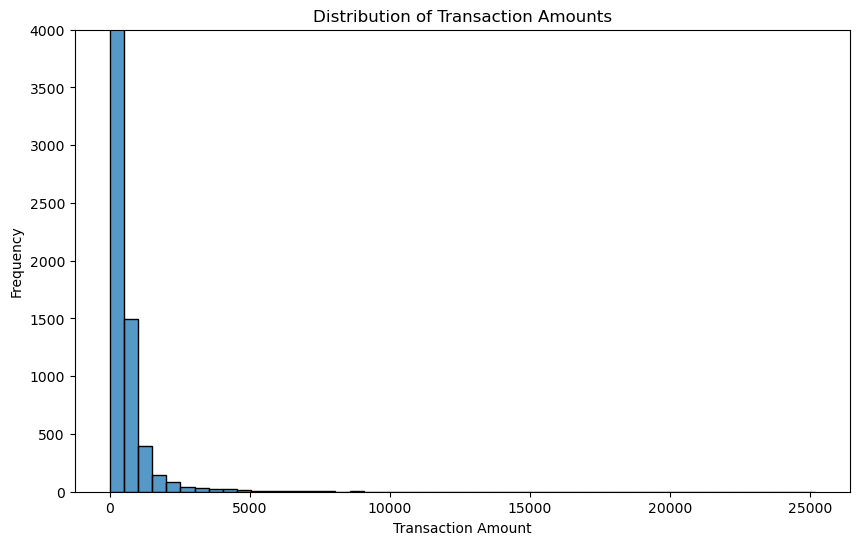

In [105]:
# Create histogram for transaction amount with limited y-axis
plt.figure(figsize=(10, 6))
sns.histplot(data=df_male, x='amt', bins=50)  
plt.ylim(0, 4000)  # Limit y-axis to focus on main range
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")

Text(0.5, 1.0, 'Boxplot of Transaction Amounts')

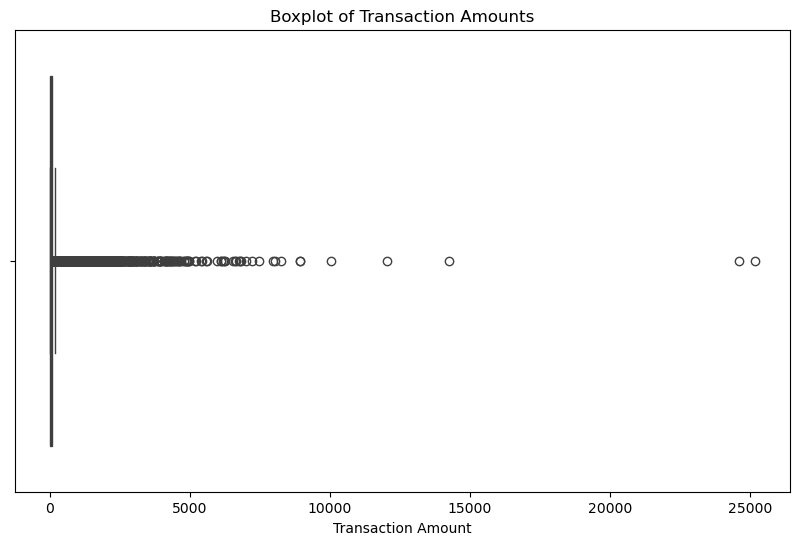

In [106]:
# Create boxplot for transaction amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_male, x='amt')
plt.xlabel("Transaction Amount")
plt.title("Boxplot of Transaction Amounts")

> Insights: 
* The histogram and box plot reveal the presence of significant outliers, which should be addressed during data preprocessing to avoid skewed analysis.
* Most transaction values are within a range of 5000, suggesting that the majority of transactions are lower in value, with only a few high-value transactions.

> Considerations: 
* Outliers: Significant outliers are present in the transaction amounts (amt), particularly for high-value transactions. These should be addressed in preprocessing to prevent model skew and improve insights.
* Spending-Amount Relationship: High-spending customers tend to have larger transaction amounts compared to low-spending customers. This suggests that transaction amount is a key feature for distinguishing spending habits, making it useful for clustering customers into high and low spenders.
* Data Distribution: Most transaction values are clustered below 5000, with very few high-value transactions, which may necessitate scaling or transformation.
* Feature Preprocessing: Transaction amount (amt) would benefit from scaling or transformation (e.g., log transformation) to reduce skewness for modeling.

> Issues found: 
* High Variability in Transaction Amount: A high standard deviation suggests a wide spread in transaction values, which may introduce challenges when modeling without proper preprocessing.
* Influence of Outliers: Outliers in transaction amounts could impact data analysis and model performance, potentially leading to misclassification without appropriate handling.

#### B.3.b Feature "category"

In [107]:
# Display the summary statistics
df_male['category'].describe()

count          232877
unique             14
top       grocery_pos
freq            24039
Name: category, dtype: object

> Insights: 
* Unique Categories: There are 14 unique transaction categories in the dataset, indicating a diverse set of transaction types.
* Most Common Category: The grocery_pos (Point of Sale) category is the most frequent, appearing 24,039 times, suggesting that grocery-related transactions are a major component of this dataset.
* Transaction Distribution: The high frequency of certain categories, like grocery_pos, could imply potential spending patterns or trends in the dataset, which may be useful for targeted analysis in customer behavior.

In [108]:
# Display the unique values and its count
df_male['category'].value_counts()


category
grocery_pos       24039
home              23566
gas_transport     23189
shopping_pos      19833
food_dining       17383
entertainment     17343
kids_pets         17277
misc_pos          15903
shopping_net      15771
health_fitness    15744
grocery_net       12594
personal_care     11522
misc_net          11464
travel             7249
Name: count, dtype: int64

Text(0.5, 1.0, 'Transaction Count by Category (Descending Order)')

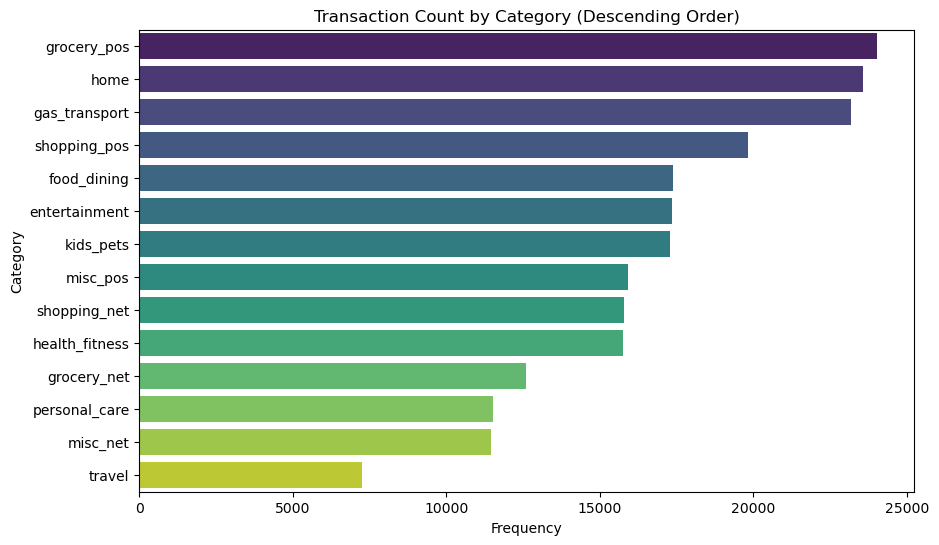

In [109]:
# Sort categories by frequency
category_order = df_male['category'].value_counts().index  # Get categories in descending order of frequency

# Create a count plot for the 'category' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_male, y='category', palette="viridis", order=category_order)  
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.title("Transaction Count by Category (Descending Order)")

> Insights: 
* Popular Transaction Categories: The most frequent transaction categories include grocery_pos, gas_transport, and home, each with close to or over 20,000 transactions. These categories represent essential and frequent spending areas.
* Less Frequent Categories: Categories like travel and personal_care have fewer transactions, indicating they are less common in this dataset, likely due to being discretionary expenses.
* Behavioral Trends: The prominence of categories like grocery_pos and gas_transport suggests a focus on routine or necessity-based spending. This distribution could help in developing targeted insights on customer spending habits.
* Potential for Spending Analysis: High-frequency categories could indicate routine spending behavior, while lower-frequency categories might highlight special or occasional spending patterns. These insights can help identify consistent versus sporadic spending habits, which is valuable for understanding customer profiles and tailoring marketing strategies accordingly.

In [110]:
# Calculate average transaction amount by category in descending order
avg_amt_by_category = df_male.groupby('category')['amt'].mean().sort_values(ascending=False)
print("Average Transaction Amount by Category:\n", avg_amt_by_category)

Average Transaction Amount by Category:
 category
shopping_net      65.476324
misc_net          64.042870
grocery_pos       62.986598
shopping_pos      61.833301
misc_pos          61.484557
gas_transport     61.104548
grocery_net       60.803616
travel            60.095249
entertainment     59.768871
food_dining       59.280230
home              58.715469
kids_pets         58.252491
health_fitness    56.506489
personal_care     54.122687
Name: amt, dtype: float64


In [111]:
# Calculate percentage of each category in the dataset
category_percentage = (df_male['category'].value_counts(normalize=True) * 100).round(2)
print("\nCategory Percentage of Total Transactions:\n", category_percentage)


Category Percentage of Total Transactions:
 category
grocery_pos       10.32
home              10.12
gas_transport      9.96
shopping_pos       8.52
food_dining        7.46
entertainment      7.45
kids_pets          7.42
misc_pos           6.83
shopping_net       6.77
health_fitness     6.76
grocery_net        5.41
personal_care      4.95
misc_net           4.92
travel             3.11
Name: proportion, dtype: float64


> Insights: 
* High-Value Categories: Shopping_net and misc_net have the highest average transaction amounts, indicating occasional high-value purchases, while grocery_pos also ranks high, likely due to regular expenses.
* Common Transaction Categories: Grocery_pos, home, and gas_transport make up the largest share of transactions (over 9% each), highlighting frequent, routine spending.
* Low-Frequency, Lower-Value Categories: Personal_care and travel are less frequent and have lower average amounts, suggesting more infrequent spending.
* Spending Habits Focus: Categories such as shopping_net and misc_net, which tend to have higher transaction amounts, could be prioritized when analyzing spending habits. These categories may help identify high-spending patterns and provide insights for targeted marketing strategies.

> Considerations: 
* High Spending Variability: Categories exhibit significant variability in transaction amounts and frequencies, necessitating diverse approaches for clustering analysis. This variability can help identify distinct customer segments, with different strategies required to analyze high spenders versus more consistent or sporadic spenders.
* Frequent and Essential Spending: Categories such as grocery_pos and gas_transport dominate the dataset, reflecting routine spending patterns which could help in building customer segmentation models.
* High-Value and Low-Frequency Categories: Categories like shopping_net and misc_net, which have higher average transaction values, may indicate high spending categories.
* Behavioral Analysis Potential: The diversity of categories allows for detailed customer behavior analysis, aiding in personalized marketing and targeted service offerings.

> Issues found: 
* Class Imbalance Across Categories: Some categories, such as travel and personal_care, have much lower transaction counts, which may lead to challenges in building balanced models for certain types of analysis.
* Outlier Handling: High-value transactions in certain categories may skew averages and other metrics, so careful outlier detection and treatment is needed.
* Data Interpretation: High-frequency categories may mask potential patterns, while low-frequency categories could exaggerate them, which could impact the reliability of analysis.

<hr>

## C. Data Cleaning


data_cleaning_executive_summary:

The data cleaning process involved addressing potential issues with missing values, duplicates, and outliers to ensure data quality and model reliability.

Key Actions:

* Missing Values: The dataset contains no missing values, ensuring completeness and reliability for analysis.
* Duplicate Values: A check for duplicates confirmed no duplicate entries, preserving data integrity and preventing over-representation of any transaction.
* Outliers: Log transformation was applied to the amt column to reduce skewness without removing high-value transactions. This approach brings extreme values closer to the mean, improving balance and interpretability for analysis and modeling.

The data is now clean and consistent, ready for feature engineering and modeling steps.

<hr>

### C.1 Fixing "Missing values"

> Rationale: 
* Missing values can lead to inaccuracies in data analysis and model predictions.
* To ensure a complete dataset, missing values need to be handled either by imputation (filling with mean, median, or mode) or by removing the rows/columns with significant amounts of missing data.
* This helps improve data quality and ensures that model performance is not biased due to missing information.

In [112]:
# Checking for missing values
df_male.isna().sum()

cc_num        0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

> Results: 

The dataset has no missing data, ensuring completeness and reliability for further analysis.

<hr>

### C.2 Fixing "Duplicate values"

> Rationale: 
* Duplicate values can skew the analysis by over-representing certain data points.
* Removing duplicates ensures that each observation is unique, providing an accurate and balanced dataset for analysis or model training.

In [113]:
# Checking for duplicate values
df_male.duplicated().sum()

0

> Results: 

No duplicate values were found in the dataset, ensuring data integrity and preventing biased results in model development.

<hr>

### C.3 Fixing "Outliers"

> Rationale:  
* Log transformation reduces skewness in amt, bringing extreme values closer to the mean without removing data, which helps preserve important information for analysis.

In [114]:
# Apply log transformation (adding 1 to handle zero values if any)
df_male['amt_log'] = np.log1p(df_male['amt'])

> Results: 

The transformed amt_log is more normalized, with high-value transactions compressed, improving data balance and interpretability for modeling.

<hr>

## D. Feature Engineering

feature_engineering_executive_summary:

In this feature engineering phase, several new features were developed to provide deeper insights into customer transaction behavior, enhancing the model's predictive power. The following features were created:
* merchant_freq: This feature quantifies customer loyalty and merchant popularity by capturing the frequency of transactions with each merchant. It provides valuable insights for customer segmentation.
* total_amt: By aggregating total spending per customer, this feature supports the identification of high and low spenders, facilitating segmentation for more targeted strategies.
* trans_count: This feature captures the total number of transactions per customer, offering insights into customer engagement frequency and aiding in the segmentation of high-frequency versus low-frequency customers.

Together, these features enable more effective analysis of transactional patterns, customer behaviors, and enhance clustering and segmentation strategies.

<hr>

<hr>

### D.1 New Feature "merchant_freq"

> Rationale:
* Transaction Insights: Understanding transaction frequency helps analyze customer loyalty and preferences.
* Customer Segmentation: Tailors marketing strategies based on merchant popularity among accounts.

In [115]:
# Create new feature merchant_freq to capture customer loyalty and merchant popularity 
df_male['merchant_freq'] = df_male.groupby(['acct_num', 'merchant'])['trans_num'].transform('count')

> Results: 
* Created the merchant_freq feature to quantify how many transactions each account has with each merchant.
* Enables analysis of customer loyalty and popular merchants

<hr>

### D.2 New Feature "total_amt"

> Rationale: 
* Aggregates customer spending, enabling segmentation into high and low spenders. Enhances clustering by providing a clear measure of total financial activity.

In [116]:
# Using transform to create the total spending feature
df_male['total_amt'] = df_male.groupby('acct_num')['amt'].transform('sum')

> Results:

Created total_amt feature to represent total spending per customer, supporting targeted segmentation and improved clustering.

<hr>

### D.3 New Feature "trans_count"

> Rationale:
* The trans_count feature captures the total number of transactions per account, offering insights into customer activity frequency.
* Helps identify high-frequency versus low-frequency customers, aiding segmentation for targeted strategies (e.g., frequent shoppers vs. occasional customers).

In [117]:
# Create the transaction count feature by grouping by 'cc_num' and counting the number of transactions
df_male['trans_count'] = df_male.groupby('acct_num')['trans_num'].transform('count')

> Results: 

Created the trans_count feature to represent the total number of transactions for each account, supporting clustering based on customer engagement frequency.

<hr>

<hr>

## E. Save Datasets

In [118]:
# Save the dataset
df_male.to_csv('adults_2550_male.csv', index=False)

<hr>

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a425463-7d70-48a4-ba8a-cc6d45d6eab2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>